<a href="https://colab.research.google.com/github/daniyal9538/CID/blob/master/CIDv0_3_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Get data and dependencies

In [0]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers
import cv2
import matplotlib.pyplot as plt 

from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils
import numpy as np 


Using TensorFlow backend.


In [0]:
# Authenticate to GCS.
from google.colab import auth
auth.authenticate_user()

# https://cloud.google.com/resource-manager/docs/creating-managing-projects
project_id = 'test-demo-222423'
bucket_name = 'cid_training_data'
# Create the service client.
from googleapiclient.discovery import build
gcs_service = build('storage', 'v1')

from apiclient.http import MediaIoBaseDownload


In [0]:
try: 
    download_name = "training_data.npy"
    path_name = "balanced_data/compiled_data.npy"

    with open(download_name, 'wb') as f:
      # Download the file from a given Google Cloud Storage bucket.
      request = gcs_service.objects().get_media(bucket=bucket_name,
                                                object=path_name)
      media = MediaIoBaseDownload(f, request)

      done = False
      while not done:
        # _ is a placeholder for a progress object that we ignore.
        # (Our file is small, so we skip reporting progress.)
        _, done = media.next_chunk()        

    print('Download complete')
except Exception as e:
    
    print("Could not download download file", e)
    

#Define Models

In [0]:
def model_1(height, width, channels, classes):
  model = Sequential()
    
  inputShape = (height, width, 1)
  chanDim = -1

  model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
  model.add(MaxPooling2D(2,2))
  model.add(BatchNormalization(axis = chanDim))
  model.add(Dropout(0.2))

  model.add(Conv2D(32, (3,3), activation = 'relu'))
  model.add(MaxPooling2D(2,2))
  model.add(BatchNormalization(axis = chanDim))
  model.add(Dropout(0.2))

  model.add(Conv2D(32, (3,3), activation = 'relu'))
  model.add(MaxPooling2D(2,2))
  model.add(BatchNormalization(axis = chanDim))
  model.add(Dropout(0.2))
  model.add(Flatten())

  model.add(Dense(512, activation = 'relu'))
  model.add(BatchNormalization(axis = chanDim))
  model.add(Dropout(0.5))
  model.add(Dense(classes, activation = 'softmax'))
  
  return (model)
  

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving models_my_model.h5 to models_my_model.h5
User uploaded file "models_my_model.h5" with length 46361952 bytes


In [0]:
def mod_alexNet(height, width, channels, classes):
  model = Sequential()
  chanDim = -1
  inputShape = (height, width, 1)
  model.add(Conv2D(96, kernel_size=(11,11), strides=(2,2),  padding='valid', activation = 'relu', input_shape = inputShape))
  #model.add(Conv2D(filters=96, input_shape=inputShape, kernel_size=(11,11), strides=(4,4), padding='valid'))
  #model.add(Activation('relu'))
  
  # Max Pooling
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
  model.add(BatchNormalization(axis = chanDim))
  # 2nd Convolutional Layer
  model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
  model.add(Activation('relu'))
  # Max Pooling
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
  model.add(BatchNormalization(axis = chanDim))
  
  # 3rd Convolutional Layer
  model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
  model.add(Activation('relu'))

  # 4th Convolutional Layer
  model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
  model.add(Activation('relu'))

  # 5th Convolutional Layer
  model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
  model.add(Activation('relu'))
  # Max Pooling
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
  
  model.add(BatchNormalization(axis = chanDim))
  
  # Passing it to a Fully Connected layer
  model.add(Flatten())
  # 1st Fully Connected Layer
  model.add(Dense(4096, input_shape=(height*width*channels,)))
  model.add(Activation('relu'))
  # Add Dropout to prevent overfitting
  model.add(Dropout(0.4))

  # 2nd Fully Connected Layer
  model.add(Dense(4096))
  model.add(Activation('relu'))
  # Add Dropout
  model.add(Dropout(0.4))

  # 3rd Fully Connected Layer
  model.add(Dense(1000))
  model.add(Activation('relu'))
  # Add Dropout
  model.add(Dropout(0.4))
  model.add(Dense(classes, activation = 'softmax'))
  return(model)

#Prepare data

In [0]:
data = np.load('training_data.npy', allow_pickle = True)

In [0]:
np.random.shuffle(data)

In [0]:
X = []
Y = []
for i in data:
  X.append(i[0])
  Y.append(np.array(i[1]))

In [0]:
X = np.array(X)
Y = np.array(Y)

In [0]:
X_train = np.reshape(X, (-1, 120, 160, 1))
#Y_train = np.reshape(Y, (-1, 120, 160, 1))

#Train model (model 1)

In [0]:
model = model_1(120, 160, 1, 5)
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
CNN = model.fit(X_train, Y, epochs = 20, batch_size = 50,  validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 75496 samples, validate on 18874 samples
Epoch 1/20
75496/75496 [==============================] - 62s 823us/step - loss: 1.4727 - acc: 0.4206 - val_loss: 1.2717 - val_acc: 0.4629
Epoch 2/20
75496/75496 [==============================] - 55s 734us/step - loss: 1.1990 - acc: 0.5073 - val_loss: 1.1081 - val_acc: 0.5483
Epoch 3/20
75496/75496 [==============================] - 56s 736us/step - loss: 1.1067 - acc: 0.5504 - val_loss: 1.0749 - val_acc: 0.5567
Epoch 4/20
75496/75496 [==============================] - 56s 736us/step - loss: 1.0211 - acc: 0.5892 - val_loss: 0.9764 - val_acc: 0.5984
Epoch 5/20
75496/75496 [==============================] - 56s 740us/step - loss: 0.9520 - acc: 0.6176 - val_loss: 0.8904 - val_acc: 0.6508
Epoch 6/20
75496/75496 [==============================] - 55s 734us/step - loss: 0.8840 - acc: 0.6496 - val_loss: 0.8746 - val_acc: 0.6509
Epoch 7/20
75496/75496 [==============================] - 56s 737us/

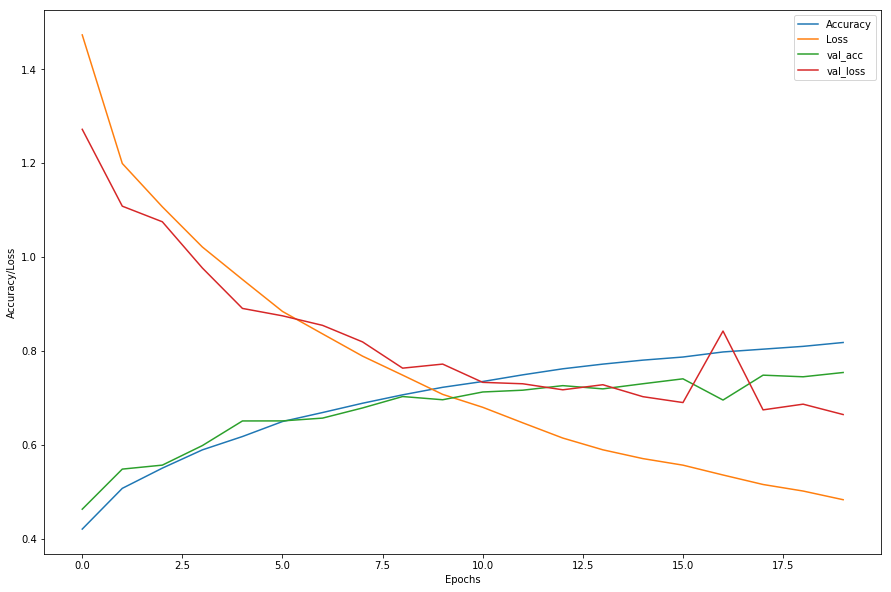

In [0]:
plt.figure(figsize = (15,10))
plt.plot(range(20), CNN.history['acc'], label = 'Accuracy')
plt.plot(range(20), CNN.history['loss'], label = 'Loss')
plt.plot(range(20), CNN.history['val_acc'], label = 'val_acc')
plt.plot(range(20), CNN.history['val_loss'], label = 'val_loss')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Epochs")
plt.ylabel('Accuracy/Loss')

plt.legend(loc = "best")

In [0]:
CNN = model.fit(X_train, Y, epochs = 20, batch_size = 50,  validation_split=0.2)

Train on 75496 samples, validate on 18874 samples
Epoch 1/20
75496/75496 [==============================] - 56s 740us/step - loss: 0.4742 - acc: 0.8198 - val_loss: 0.6652 - val_acc: 0.7556
Epoch 2/20
75496/75496 [==============================] - 55s 734us/step - loss: 0.4565 - acc: 0.8265 - val_loss: 0.6815 - val_acc: 0.7506
Epoch 3/20
75496/75496 [==============================] - 56s 738us/step - loss: 0.4474 - acc: 0.8307 - val_loss: 0.6698 - val_acc: 0.7580
Epoch 4/20
75496/75496 [==============================] - 56s 740us/step - loss: 0.4389 - acc: 0.8337 - val_loss: 0.6590 - val_acc: 0.7529
Epoch 5/20
75496/75496 [==============================] - 56s 736us/step - loss: 0.4283 - acc: 0.8377 - val_loss: 0.6657 - val_acc: 0.7628
Epoch 6/20
75496/75496 [==============================] - 56s 736us/step - loss: 0.4108 - acc: 0.8450 - val_loss: 0.6632 - val_acc: 0.7622
Epoch 7/20
75496/75496 [==============================] - 56s 739us/step - loss: 0.4025 - acc: 0.8492 - val_loss: 0.

In [0]:
model.save('my_model.h5') 
del(model)

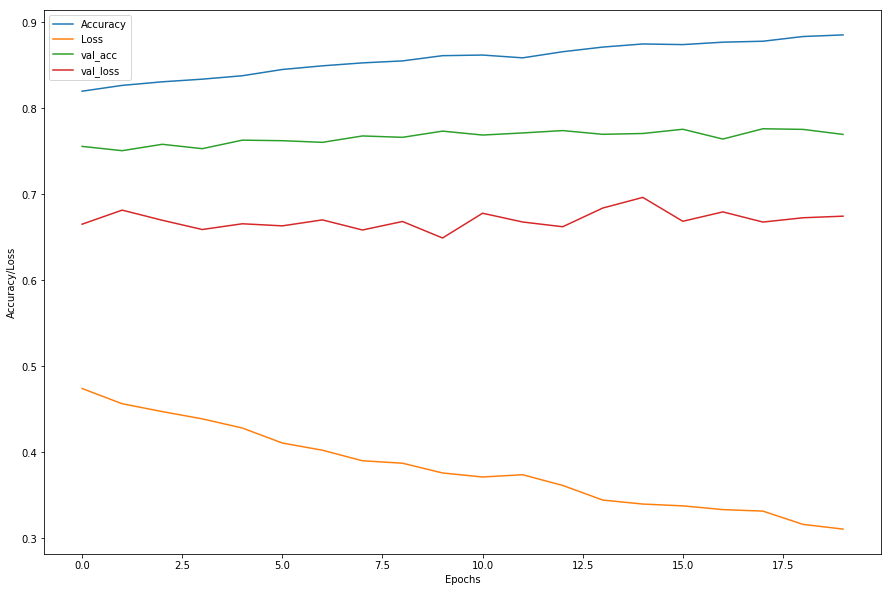

In [0]:
plt.figure(figsize = (15,10))
plt.plot(range(20), CNN.history['acc'], label = 'Accuracy')
plt.plot(range(20), CNN.history['loss'], label = 'Loss')
plt.plot(range(20), CNN.history['val_acc'], label = 'val_acc')
plt.plot(range(20), CNN.history['val_loss'], label = 'val_loss')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Epochs")
plt.ylabel('Accuracy/Loss')

plt.legend(loc = "best")

#Train Model (Alex Net)

In [0]:
alex = mod_alexNet(120, 160, 1, 5)
alex.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
CNN = alex.fit(X_train, Y, epochs = 25, batch_size = 50,  validation_split=0.2)

Train on 75496 samples, validate on 18874 samples
Epoch 1/25
75496/75496 [==============================] - 145s 2ms/step - loss: 1.5923 - acc: 0.2777 - val_loss: 1.5394 - val_acc: 0.3169
Epoch 2/25
75496/75496 [==============================] - 139s 2ms/step - loss: 1.4809 - acc: 0.3523 - val_loss: 1.5160 - val_acc: 0.2852
Epoch 3/25
75496/75496 [==============================] - 139s 2ms/step - loss: 1.3183 - acc: 0.4553 - val_loss: 1.4813 - val_acc: 0.4275
Epoch 4/25
75496/75496 [==============================] - 139s 2ms/step - loss: 1.2027 - acc: 0.5047 - val_loss: 1.2805 - val_acc: 0.4475
Epoch 5/25
75496/75496 [==============================] - 139s 2ms/step - loss: 1.0973 - acc: 0.5510 - val_loss: 1.2043 - val_acc: 0.5264
Epoch 6/25
75496/75496 [==============================] - 138s 2ms/step - loss: 0.9852 - acc: 0.6030 - val_loss: 1.2824 - val_acc: 0.5060
Epoch 7/25
75496/75496 [==============================] - 138s 2ms/step - loss: 0.8737 - acc: 0.6469 - val_loss: 1.0040 - 

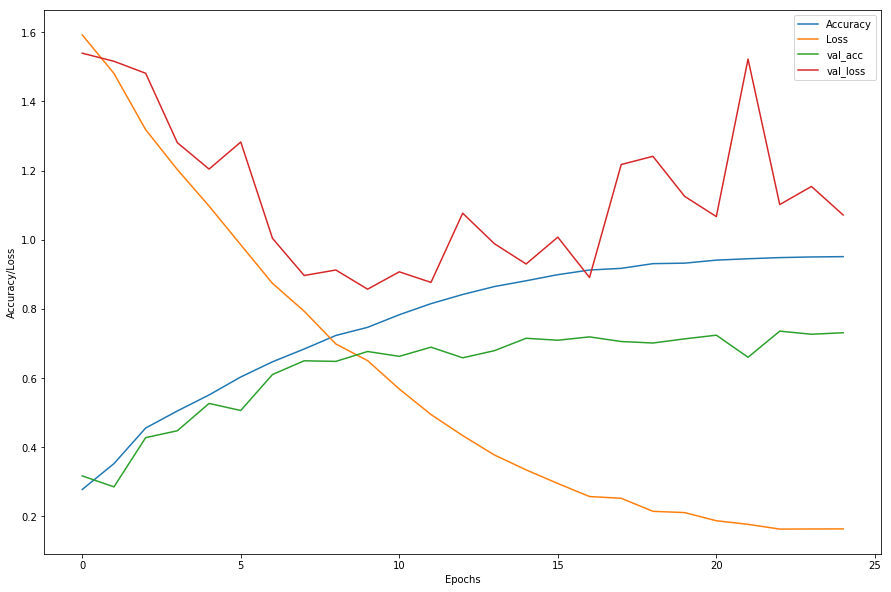

In [0]:
plt.figure(figsize = (15,10))
plt.plot(range(25), CNN.history['acc'], label = 'Accuracy')
plt.plot(range(25), CNN.history['loss'], label = 'Loss')
plt.plot(range(25), CNN.history['val_acc'], label = 'val_acc')
plt.plot(range(25), CNN.history['val_loss'], label = 'val_loss')
#ax1.set_xticks(np.arange(0, 31, 5))
plt.xlabel("Epochs")
plt.ylabel('Accuracy/Loss')

plt.legend(loc = "best")

#Ongoing work